In [14]:
import warnings
from transformers import (
    AutoTokenizer, 
    BertForSequenceClassification,
    pipeline,
)

warnings.filterwarnings("ignore")

finbert_pt_br_tokenizer = AutoTokenizer.from_pretrained("lucas-leme/FinBERT-PT-BR")
finbert_pt_br_model = BertForSequenceClassification.from_pretrained("lucas-leme/FinBERT-PT-BR")

finbert_pt_br_pipeline = pipeline(task='text-classification', model=finbert_pt_br_model, tokenizer=finbert_pt_br_tokenizer)

In [15]:
import warnings
from transformers import (
    BertTokenizer, 
    BertForSequenceClassification,
    pipeline,
)

warnings.filterwarnings("ignore")

finbert_tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")
finbert_model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert")

finbert_pipeline = pipeline(task='text-classification', model=finbert_model, tokenizer=finbert_tokenizer)

In [16]:
import pandas as pd

news = pd.read_csv('../data/news/noticias_mercado financeiro_sentimentos.csv')
news_list = news['Notícia'].to_list()

In [17]:
pd.set_option('display.max_colwidth', None)

In [18]:
# Comparação FinBERT vs FinBERT-PT-BR

# FinBERT
finbert_outputs = pd.DataFrame(finbert_pipeline(news_list[:10]))
finbert_outputs['news'] = news_list[:10]

# FinBER-PT-BR
finbert_pt_br_outputs = pd.DataFrame(finbert_pt_br_pipeline(news_list[:10]))
finbert_pt_br_outputs['news'] = news_list[:10]

# Exibindo resultados
display(
    finbert_outputs,
    finbert_pt_br_outputs,
)

,label,score,news
0,positive,0.766157,Unipar e MELVER estão com inscrições abertas para MBA em Mercado Financeiro
1,positive,0.625554,"Mercado financeiro hoje: Vale (VALE3) em busca de parceiro, Azul (AZUL4) em \napuros e acordo da Weg (WEGE3) de R$ 630 milhões – Mercado – Estadão \nE-Investidor – As principais notícias do mercado financeiro"
2,neutral,0.848194,Briga entre X e STF pode afastar investidores do Brasil? Especialistas \ndivergem
3,neutral,0.947857,Podcast | Fechamento de Mercado - 03/09/2024
4,neutral,0.935288,Comentario semanal - Perspectivas
5,neutral,0.865317,Apagão cibernético global causa tensão no mercado financeiro
6,positive,0.652962,Confira dez tendências que o mercado financeiro deve incorporar nos \npróximos anos
7,neutral,0.850085,Mercados financeiros hoje: tom negativo em NY marca volta de feriado
8,positive,0.770710,Políticas do governo federal fazem PIB crescer acima do esperado e rumar \npara 3% ao final do ano
9,positive,0.570883,Setor financeiro ganha destaque nas indicações de ações para setembro


,label,score,news
0,NEUTRAL,0.700441,Unipar e MELVER estão com inscrições abertas para MBA em Mercado Financeiro
1,NEGATIVE,0.515265,"Mercado financeiro hoje: Vale (VALE3) em busca de parceiro, Azul (AZUL4) em \napuros e acordo da Weg (WEGE3) de R$ 630 milhões – Mercado – Estadão \nE-Investidor – As principais notícias do mercado financeiro"
2,NEGATIVE,0.850306,Briga entre X e STF pode afastar investidores do Brasil? Especialistas \ndivergem
3,NEUTRAL,0.614209,Podcast | Fechamento de Mercado - 03/09/2024
4,NEUTRAL,0.610426,Comentario semanal - Perspectivas
5,NEGATIVE,0.848840,Apagão cibernético global causa tensão no mercado financeiro
6,NEUTRAL,0.725723,Confira dez tendências que o mercado financeiro deve incorporar nos \npróximos anos
7,NEGATIVE,0.821666,Mercados financeiros hoje: tom negativo em NY marca volta de feriado
8,NEGATIVE,0.554580,Políticas do governo federal fazem PIB crescer acima do esperado e rumar \npara 3% ao final do ano
9,POSITIVE,0.519682,Setor financeiro ganha destaque nas indicações de ações para setembro


In [28]:
news

,Data,Notícia,Sentimento,Score
0,2024-09-03,Unipar e MELVER estão com inscrições abertas para MBA em Mercado Financeiro,NEUTRAL,0.700441
1,2024-09-03,"Mercado financeiro hoje: Vale (VALE3) em busca de parceiro, Azul (AZUL4) em \napuros e acordo da Weg (WEGE3) de R$ 630 milhões – Mercado – Estadão \nE-Investidor – As principais notícias do mercado financeiro",NEGATIVE,0.515265
2,2024-09-03,Briga entre X e STF pode afastar investidores do Brasil? Especialistas \ndivergem,NEGATIVE,0.850306
3,2024-09-03,Podcast | Fechamento de Mercado - 03/09/2024,NEUTRAL,0.614209
4,2024-09-03,Comentario semanal - Perspectivas,NEUTRAL,0.610426
...,...,...,...,...
30477,2014-09-08,Meu salário é de R$ 20 mil; como investir para me aposentar aos 45 com \nrenda de R$ 15 mil?,NEUTRAL,0.717937
30478,2014-09-08,» AMAZONAS ATUAL - Cartões pré-pagos avançam no mercado,POSITIVE,0.697899
30479,2014-09-08,Loja de roupas para executivas fatura R$ 600 mil em um ano e mira franquias,POSITIVE,0.721196
30480,2014-09-08,Investir em obras de arte é opção para quem já tem carteira diversificada,NEUTRAL,0.653174


In [29]:
news.loc[news['Sentimento'] == 'POSITIVE', 'score_signal'] = news.loc[news['Sentimento'] == 'POSITIVE', 'Score']
news.loc[news['Sentimento'] == 'NEGATIVE', 'score_signal'] = news.loc[news['Sentimento'] == 'NEGATIVE', 'Score'] * -1
news.loc[news['Sentimento'] == 'NEUTRAL', 'score_signal'] = 0
news

,Data,Notícia,Sentimento,Score,score_signal
0,2024-09-03,Unipar e MELVER estão com inscrições abertas para MBA em Mercado Financeiro,NEUTRAL,0.700441,0.000000
1,2024-09-03,"Mercado financeiro hoje: Vale (VALE3) em busca de parceiro, Azul (AZUL4) em \napuros e acordo da Weg (WEGE3) de R$ 630 milhões – Mercado – Estadão \nE-Investidor – As principais notícias do mercado financeiro",NEGATIVE,0.515265,-0.515265
2,2024-09-03,Briga entre X e STF pode afastar investidores do Brasil? Especialistas \ndivergem,NEGATIVE,0.850306,-0.850306
3,2024-09-03,Podcast | Fechamento de Mercado - 03/09/2024,NEUTRAL,0.614209,0.000000
4,2024-09-03,Comentario semanal - Perspectivas,NEUTRAL,0.610426,0.000000
...,...,...,...,...,...
30477,2014-09-08,Meu salário é de R$ 20 mil; como investir para me aposentar aos 45 com \nrenda de R$ 15 mil?,NEUTRAL,0.717937,0.000000
30478,2014-09-08,» AMAZONAS ATUAL - Cartões pré-pagos avançam no mercado,POSITIVE,0.697899,0.697899
30479,2014-09-08,Loja de roupas para executivas fatura R$ 600 mil em um ano e mira franquias,POSITIVE,0.721196,0.721196
30480,2014-09-08,Investir em obras de arte é opção para quem já tem carteira diversificada,NEUTRAL,0.653174,0.000000


In [31]:
news["Data"] = pd.to_datetime(news["Data"], format='%Y-%m-%d')

In [41]:
import yfinance as yf

dados= yf.download('BOVA11.SA', start=min(news['Data']), end=max(news['Data']))['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [95]:
df_dia = news[news['Sentimento'] != 'NEUTRAL'].resample('M', on='Data')['score_signal', 'Score'].mean()
df_dia.describe()

,score_signal,Score
count,121.000000,121.000000
mean,-0.208655,0.709176
std,0.146424,0.018194
min,-0.540855,0.663629
25%,-0.314925,0.698137
50%,-0.203465,0.709746
75%,-0.122070,0.722450
max,0.250188,0.747742


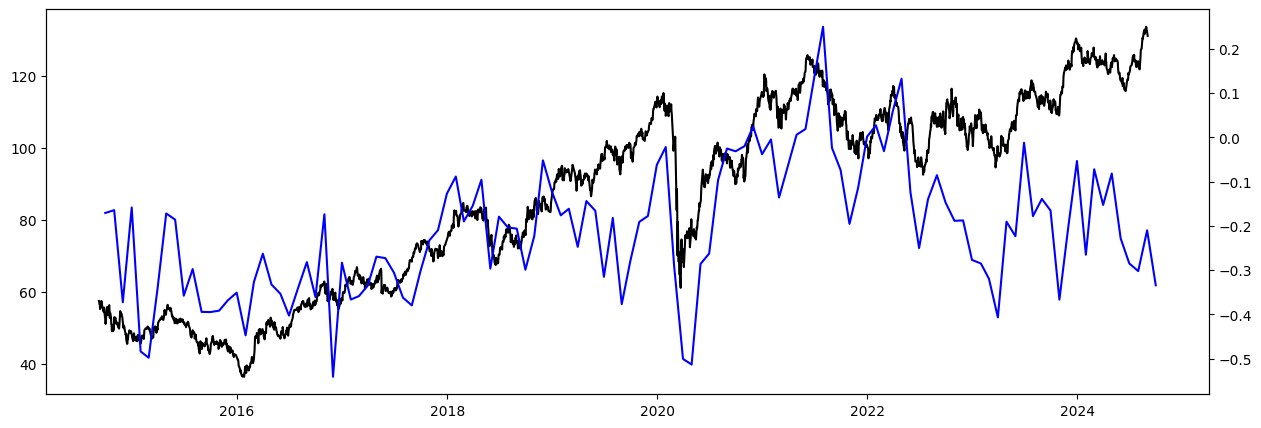

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))

ax2 = ax.twinx()
ax.plot(dados, color='black')
ax2.plot(df_dia['score_signal'], color='blue')

plt.show()

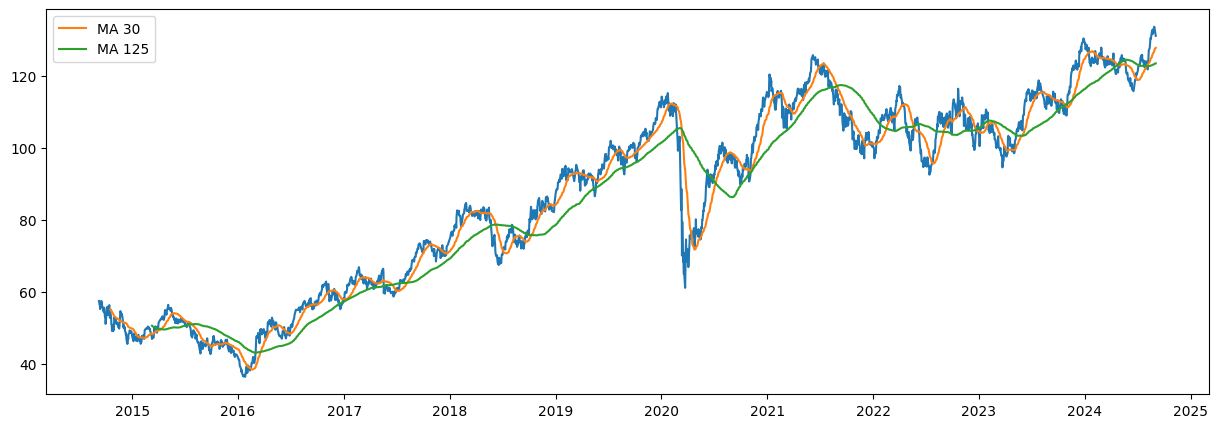

In [97]:
ma_125 = dados.rolling(125).mean()
ma_30 = dados.rolling(30).mean()

plt.figure(figsize=(15, 5))

plt.plot(dados)
plt.plot(ma_30, label='MA 30')
plt.plot(ma_125, label='MA 125')

plt.legend()

plt.show()

In [98]:
dados2 = dados.resample('M').mean()

In [99]:
df_dados = dados2.to_frame().merge(df_dia, left_on='Date', right_on='Data', how='left')
df_dados['score_signal'].corr(df_dados['Adj Close'])

0.5888172101207348

In [12]:
sentiments = pd.DataFrame(finbert_pt_br_pipeline(news_list))
sentiments


,label,score
0,NEUTRAL,0.700441
1,NEGATIVE,0.515265
2,NEGATIVE,0.850306
3,NEUTRAL,0.614209
4,NEUTRAL,0.610426
...,...,...
30477,NEUTRAL,0.717937
30478,POSITIVE,0.697899
30479,POSITIVE,0.721196
30480,NEUTRAL,0.653174


In [3]:
assert len(sentiments) == len(news), "Sentiments and news must have the same length"

NameError: name 'sentiments' is not defined

In [15]:
news['Sentimento'] = sentiments['label']
news['Score'] = sentiments['score']

In [17]:
# news.to_csv('../data/news/noticias_mercado financeiro_sentimentos.csv', index=False)